In [205]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [206]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [249]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'JUKIDFNFEHDZBSIWDINCGU3GQS3FDUWSPQFEPKNM2JEBF525' # your Foursquare ID
    CLIENT_SECRET = 'IRCCR2IOLKRM5J3XY1ZLOSICQ1L2EHOC2ETC0N535KFNXFBZ' # your Foursquare Secret
    VERSION = '20200503' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [250]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'JUKIDFNFEHDZBSIWDINCGU3GQS3FDUWSPQFEPKNM2JEBF525' # your Foursquare ID
    CLIENT_SECRET = 'IRCCR2IOLKRM5J3XY1ZLOSICQ1L2EHOC2ETC0N535KFNXFBZ' # your Foursquare Secret
    VERSION = '20200503' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [251]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [210]:
df=get_new_york_data()

In [211]:
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [212]:
df.shape

(306, 4)

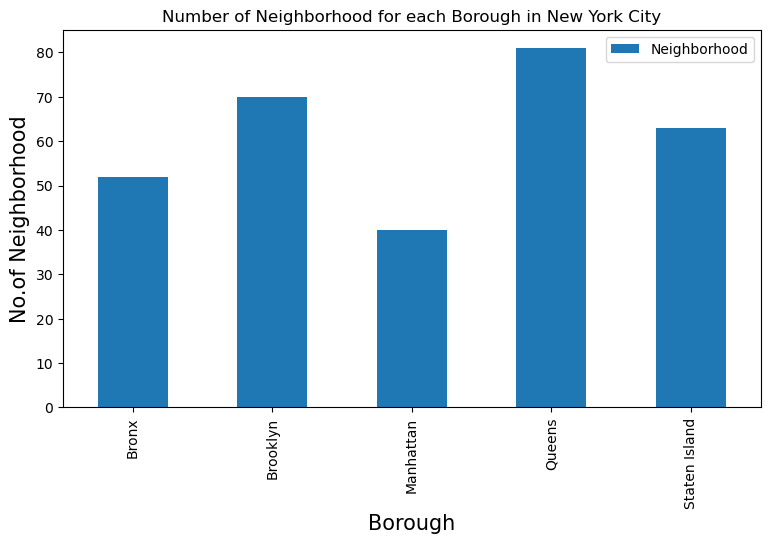

In [213]:
#figure size
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Number of Neighborhood for each Borough in New York City')

#On x-axis
plt.xlabel('Borough', fontsize = 15)

#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)

#giving a bar plot
df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')

#legend
plt.legend()

#displays the plot
plt.show()

In [229]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
my_steak=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    my_data=venues[venues['Category']=='Steakhouse']   
    print('(',count,'/',len(df),')','Restaurant in'+Neighborhood+', '+Borough+':'+str(len(my_data)))
    for detail in  my_data.values.tolist():
        id, name , category=detail
        my_steak = my_steak.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Restaurant inWakefield, Bronx:0
( 2 / 306 ) Restaurant inCo-op City, Bronx:0
( 3 / 306 ) Restaurant inEastchester, Bronx:0
( 4 / 306 ) Restaurant inFieldston, Bronx:1
( 5 / 306 ) Restaurant inRiverdale, Bronx:0
( 6 / 306 ) Restaurant inKingsbridge, Bronx:1
( 7 / 306 ) Restaurant inMarble Hill, Manhattan:1
( 8 / 306 ) Restaurant inWoodlawn, Bronx:0
( 9 / 306 ) Restaurant inNorwood, Bronx:0
( 10 / 306 ) Restaurant inWilliamsbridge, Bronx:0
( 11 / 306 ) Restaurant inBaychester, Bronx:1
( 12 / 306 ) Restaurant inPelham Parkway, Bronx:0
( 13 / 306 ) Restaurant inCity Island, Bronx:0
( 14 / 306 ) Restaurant inBedford Park, Bronx:1
( 15 / 306 ) Restaurant inUniversity Heights, Bronx:0
( 16 / 306 ) Restaurant inMorris Heights, Bronx:0
( 17 / 306 ) Restaurant inFordham, Bronx:0
( 18 / 306 ) Restaurant inEast Tremont, Bronx:0
( 19 / 306 ) Restaurant inWest Farms, Bronx:0
( 20 / 306 ) Restaurant inHigh  Bridge, Bronx:1
( 21 / 306 ) Restaurant inMelrose, Bronx:0
( 22 / 306 ) Restaurant

In [230]:
my_steak.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Fieldston,46e6f285f964a520c94a1fe3,Jake’s Steakhouse
1,Bronx,Kingsbridge,4dfe40df8877333e195b68fc,Parrilla Latina
2,Manhattan,Marble Hill,4dfe40df8877333e195b68fc,Parrilla Latina
3,Bronx,Baychester,560afe74498ec5e1b97a21a1,Outback Steakhouse
4,Bronx,Bedford Park,4ede4093b8f7fcd044cc7f24,The Bus Stop Grill Truck


In [231]:
my_steak.shape

(62, 4)

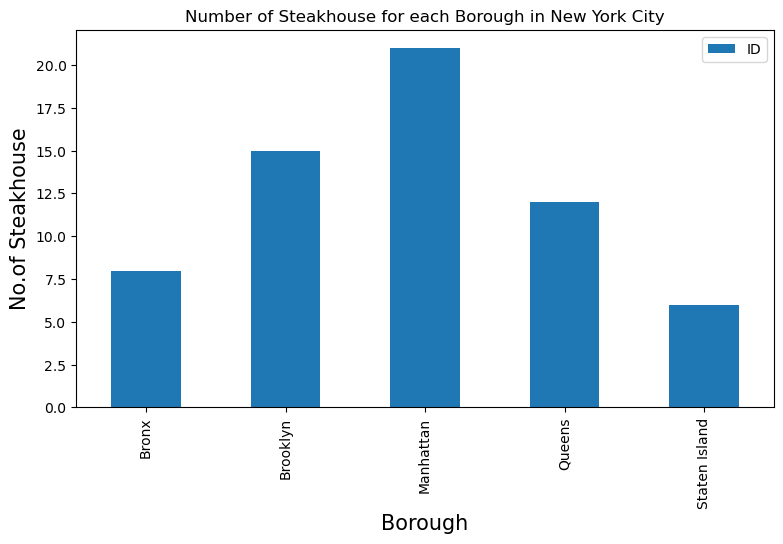

In [232]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Steakhouse for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Steakhouse', fontsize=15)
#giving a bar plot
my_steak.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

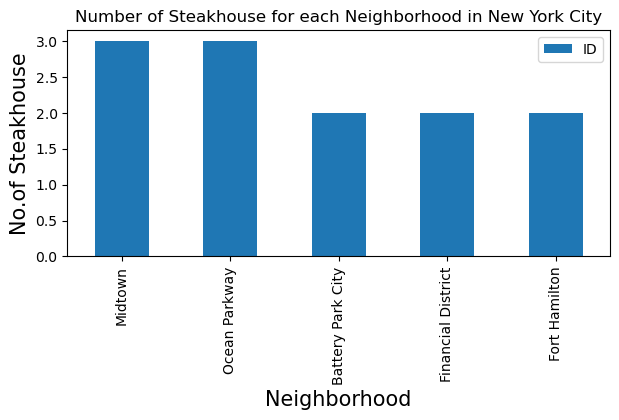

In [233]:
#figure size
plt.figure(figsize=(7,3), dpi = 100)

# title
plt.title('Number of Steakhouse for each Neighborhood in New York City')

#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)

#On y-axis
plt.ylabel('No.of Steakhouse', fontsize=15)

#giving a bar plot
my_steak.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')

#legend
plt.legend()

#displays the plot
plt.show()

In [234]:
my_steak[my_steak['Neighborhood']=='Midtown']

,Borough,Neighborhood,ID,Name
24,Manhattan,Midtown,4a303b23f964a52038991fe3,Benjamin Steakhouse
25,Manhattan,Midtown,4b0c24fef964a520be3723e3,Del Frisco's Double Eagle Steakhouse
26,Manhattan,Midtown,3fd66200f964a52042e31ee3,Keens Steakhouse


In [244]:
my_steak[my_steak['Neighborhood']=='Ocean Parkway']

,Borough,Neighborhood,ID,Name
17,Brooklyn,Ocean Parkway,50199599011cecae1f8b8968,Moldova Restaurant Brooklyn
18,Brooklyn,Ocean Parkway,4e1637696284b506cfd7e1e3,Mabat Steak House Kosher
19,Brooklyn,Ocean Parkway,4fb54ddfe4b06449f94d6c7a,Wolf & Lamb Steakhouse


In [252]:
# prepare neighborhood list that contains steakhouse
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
df_steak=pd.DataFrame(columns=column_names)
count=1


for row in my_steak.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(my_steak),')','processed')
    df_steak = df_steak.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID               Name  Likes  Rating  Tips
0  46e6f285f964a520c94a1fe3  Jake’s Steakhouse     64     8.0    29
( 1 / 62 ) processed
                         ID             Name  Likes  Rating  Tips
0  4dfe40df8877333e195b68fc  Parrilla Latina      8     7.0     6
( 2 / 62 ) processed
                         ID             Name  Likes  Rating  Tips
0  4dfe40df8877333e195b68fc  Parrilla Latina      8     7.0     6
( 3 / 62 ) processed
                         ID                Name  Likes  Rating  Tips
0  560afe74498ec5e1b97a21a1  Outback Steakhouse     19     7.4     1
( 4 / 62 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4ede4093b8f7fcd044cc7f24
( 5 / 62 ) processed
                         ID       Name  Likes  Rating  Tips
0  4c0fd7a6f1b6a593b1ee7a27  NYY STEAK     41     8.0    12
( 6 / 62 ) processed
                         ID          Name  Likes  Rating  Tips
0  53dd7aaf498e6dfaddd17fcb  Don Pa

KeyError: 'venue'

In [256]:
df_steak.head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fieldston,46e6f285f964a520c94a1fe3,Jake’s Steakhouse,64,8.0,29
1,Bronx,Kingsbridge,4dfe40df8877333e195b68fc,Parrilla Latina,8,7.0,6
2,Manhattan,Marble Hill,4dfe40df8877333e195b68fc,Parrilla Latina,8,7.0,6
3,Bronx,Baychester,560afe74498ec5e1b97a21a1,Outback Steakhouse,19,7.4,1
4,Bronx,Bedford Park,0,0,0,0.0,0
5,Bronx,High Bridge,4c0fd7a6f1b6a593b1ee7a27,NYY STEAK,41,8.0,12
6,Bronx,Mott Haven,53dd7aaf498e6dfaddd17fcb,Don Pancho's,12,8.3,3
7,Bronx,Schuylerville,5143b9f9e4b01d5368033af2,3363 SteakHouse,3,6.2,5
8,Brooklyn,Manhattan Terrace,50199599011cecae1f8b8968,Moldova Restaurant Brooklyn,24,7.4,12
9,Brooklyn,Manhattan Terrace,4fb54ddfe4b06449f94d6c7a,Wolf & Lamb Steakhouse,15,7.2,3


In [254]:
df_steak.shape

(50, 7)

In [258]:
df_steak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [260]:
df_steak['Likes']=df_steak['Likes'].astype(float)
df_steak['Tips']=df_steak['Tips'].astype(float)

In [261]:
df_steak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [273]:
#Steakhouse with 5 maximum Likes
df_steak.sort_values(by='Likes',ascending=False).head(5)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
11,Brooklyn,Williamsburg,3fd66200f964a5209beb1ee3,Peter Luger Steak House,1952.0,8.5,678.0
16,Brooklyn,South Side,3fd66200f964a5209beb1ee3,Peter Luger Steak House,1952.0,8.5,678.0
26,Manhattan,Midtown,3fd66200f964a52042e31ee3,Keens Steakhouse,1347.0,8.8,469.0
25,Manhattan,Midtown,4b0c24fef964a520be3723e3,Del Frisco's Double Eagle Steakhouse,1098.0,8.9,338.0
34,Manhattan,Financial District,3fd66200f964a520e6e81ee3,Delmonico's,397.0,8.5,133.0


In [274]:
#Steakhouse with maximum Likes
df_steak.iloc[df_steak['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              3fd66200f964a5209beb1ee3
Name             Peter Luger Steak House
Likes                               1952
Rating                               8.5
Tips                                 678
Name: 11, dtype: object

In [276]:
#Steakhouse with maximum Rating
df_steak.iloc[df_steak['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                West Village
ID              585164b77220e62219c9aeb6
Name                 4 Charles Prime Rib
Likes                                217
Rating                               9.1
Tips                                  57
Name: 31, dtype: object

In [277]:
#Steakhouse with maximum Tips
df_steak.iloc[df_steak['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              3fd66200f964a5209beb1ee3
Name             Peter Luger Steak House
Likes                               1952
Rating                               8.5
Tips                                 678
Name: 11, dtype: object

In [279]:
df_steak.groupby('Borough',as_index=False).mean()[['Borough','Rating']]

,Borough,Rating
0,Bronx,6.414286
1,Brooklyn,7.778571
2,Manhattan,8.486667
3,Queens,5.880000
4,Staten Island,6.900000


In [280]:
DF_1=df_steak.groupby('Borough',as_index=False).mean()[['Borough','Rating']]

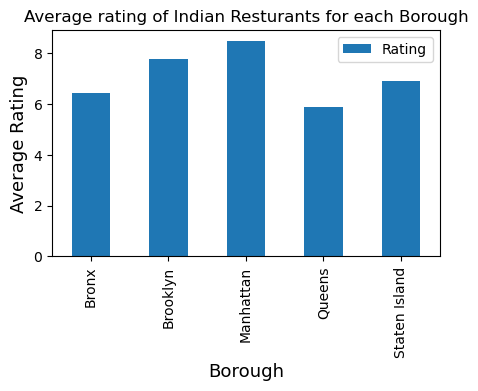

In [287]:
plt.figure(figsize=(5,3), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 13)
#On y-axis
plt.ylabel('Average Rating', fontsize=13)
#giving a bar plot
df_steak.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [289]:
df_nei_average_rat=df_steak.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
df_nei_average_rat.columns=['Neighborhood','Average Rating']

In [290]:
df_nei_average_rat.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
38,West Village,9.000000
37,Tribeca,8.900000
23,Midtown,8.766667
10,East Harlem,8.600000
39,Williamsburg,8.500000
4,Bayside,8.500000
29,Rockaway Park,8.500000
31,South Side,8.500000
25,Murray Hill,8.500000
1,Battery Park City,8.400000


In [298]:
df_nei_average_rat.sort_values(['Average Rating'],ascending=True).head(10)

,Neighborhood,Average Rating
15,Jamaica Center,0.0
5,Bedford Park,0.0
27,Oakland Gardens,0.0
9,East Elmhurst,5.8
2,Bay Terrace,6.0
30,Schuylerville,6.2
35,Tompkinsville,6.6
32,St. George,6.6
8,College Point,6.6
26,New Brighton,6.6


Let's consider all of the neighborhoods with average rating greater than 8.5

In [293]:
DF_2=df_nei_average_rat[df_nei_average_rat['Average Rating']>=8.5]
DF_2

,Neighborhood,Average Rating
4,Bayside,8.500000
10,East Harlem,8.600000
23,Midtown,8.766667
25,Murray Hill,8.500000
29,Rockaway Park,8.500000
31,South Side,8.500000
37,Tribeca,8.900000
38,West Village,9.000000
39,Williamsburg,8.500000


In [294]:
DF_3=pd.merge(DF_2,df, on='Neighborhood')

In [295]:
DF_3

,Neighborhood,Average Rating,Borough,Latitude,Longitude
0,Bayside,8.500000,Queens,40.766041,-73.774274
1,East Harlem,8.600000,Manhattan,40.792249,-73.944182
2,Midtown,8.766667,Manhattan,40.754691,-73.981669
3,Murray Hill,8.500000,Manhattan,40.748303,-73.978332
4,Murray Hill,8.500000,Queens,40.764126,-73.812763
5,Rockaway Park,8.500000,Queens,40.580343,-73.841534
6,South Side,8.500000,Brooklyn,40.710861,-73.958001
7,Tribeca,8.900000,Manhattan,40.721522,-74.010683
8,West Village,9.000000,Manhattan,40.734434,-74.006180
9,Williamsburg,8.500000,Brooklyn,40.707144,-73.958115


In [296]:
DF_3=DF_3[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
DF_3

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Bayside,40.766041,-73.774274,8.500000
1,Manhattan,East Harlem,40.792249,-73.944182,8.600000
2,Manhattan,Midtown,40.754691,-73.981669,8.766667
3,Manhattan,Murray Hill,40.748303,-73.978332,8.500000
4,Queens,Murray Hill,40.764126,-73.812763,8.500000
5,Queens,Rockaway Park,40.580343,-73.841534,8.500000
6,Brooklyn,South Side,40.710861,-73.958001,8.500000
7,Manhattan,Tribeca,40.721522,-74.010683,8.900000
8,Manhattan,West Village,40.734434,-74.006180,9.000000
9,Brooklyn,Williamsburg,40.707144,-73.958115,8.500000


### Conclusion:

1. Manhattan is the best place where you can enjoy high-class steak. It not only scores the highest 1952 Likes but also 9.1 rating.<br>
2. The average Neighborhood rating for West Village, Tribeca, Midtown are 9.0, 8.9, and 8.8. Hence, these are some of the best neighborhoods for steak gluttons.<br>
3. The potential areas for launching a steakhouse shall be Jamaica Center, Bedford Park, Oakland Gardens.

In [306]:
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         150 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages wil

In [307]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [309]:
#instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

#loop through the neighborhood and add each to the feature group
for lat, lng, in DF_3[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [310]:
DF_3['Label']=DF_3['Neighborhood']+', '+DF_3['Borough']+'('+DF_3['Average Rating'].map(str)+')'

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [311]:
#add pop-up text to each marker on the map
for lat, lng, label in DF_3[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
#add incidents to map
ny_map.add_child(incidents)